In [1]:
import pubchempy as pcp
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Lipinski
from rdkit.Chem import Crippen
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [7]:
def search_molecule(mol):
    drug = pcp.get_compounds(mol,'name')
    # show chemical formula
    
    return drug[0].isomeric_smiles

In [8]:
imatinib = Chem.MolFromSmiles(search_molecule('exanta'))

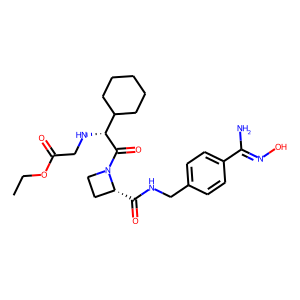

In [9]:
Chem.Draw.MolToImage(imatinib)

In [10]:
print(Crippen.MolLogP(imatinib),
      Descriptors.MolWt(imatinib),
      Lipinski.NumHAcceptors(imatinib),
      Lipinski.NumHAcceptors(imatinib))


1.0998000000000032 473.5740000000001 7 7


In [11]:
def lipinski(mol):
    print('LogP: ',Crippen.MolLogP(mol))
    print('Molecular Weight: ',Descriptors.MolWt(mol))
    print('Number of Hydrogen Acceptors: ',Lipinski.NumHAcceptors(mol))
    print('Number of Hydrogen Donors: ',Lipinski.NumHDonors(mol))

In [53]:
lipinski(imatinib)

LogP:  4.590320000000003
Molecular Weight:  493.61500000000024
Number of Hydrogen Acceptors:  7
Number of Hydrogen Donors:  2


In [34]:
def to_morganfingerprinting(smile):
    mol = Chem.MolFromSmiles(smile)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol,radius=2,nBits=1024)
    #array = np.zeros((1,))
    #DataStructs.ConvertToNumpyArray(fingerprint,array)
    return fingerprint

In [36]:
aspirin_fing = to_morganfingerprinting('CC(=O)OC1=CC=CC=C1C(O)=O')
paracetamol_fing = to_morganfingerprinting('CC(=O)NC1=CC=C(O)C=C1')

In [30]:
print(DataStructs.TanimotoSimilarity(aspirin_fing,paracetamol_fing))
print(DataStructs.DiceSimilarity(aspirin_fing,paracetamol_fing))

0.22857142857142856
0.37209302325581395


In [54]:
def similarity(fing1,fing2):
    print("Tanimoto: ",DataStructs.TanimotoSimilarity(fing1,fing2))
    print("Dice: ",DataStructs.DiceSimilarity(fing1,fing2))

In [38]:
similarity(aspirin_fing,paracetamol_fing)

Tanimoto:  0.22857142857142856
Dice:  0.37209302325581395


In [65]:
def substructure(mol1,mol2):
    sub = mol1
    sub.GetSubstructMatches(mol2)
    return sub

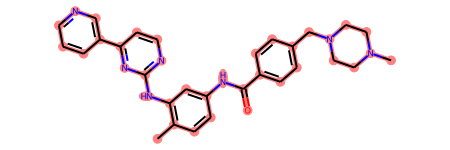

In [71]:
substructure(imatinib,imatinib)

In [5]:
search_molecule('imatinib')

'CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5'

In [6]:
def convert_smile_to_sdf(smile, name):
    
    mol = Chem.MolFromSmiles(smile)
    hmol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(hmol,AllChem.ETKDG())
        
    writer = Chem.SDWriter(name +'.sdf')
    hmol.SetProp("_Library","%s"%smile)
    hmol.SetProp("_Name","%s"%name)
    hmol.SetProp("_SourceID","%s"%name)
    hmol.SetProp("_SMILES","%s"%smile)
    writer.write(hmol)
    writer.close()
    
# code adapted from https://gist.github.com/leelasd/43219a222bf57d3e01c2c83f2ad9b031

In [7]:
convert_smile_to_sdf(search_molecule('imatinib'), 'imatinib')

In [72]:
def generate_structure_from_smiles(smiles):

    # Generate a 3D structure from smiles

    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)

    status = AllChem.EmbedMolecule(mol)
    status = AllChem.UFFOptimizeMolecule(mol)

    conformer = mol.GetConformer()
    coordinates = conformer.GetPositions()
    coordinates = np.array(coordinates)

    atoms = mol.GetAtoms()

    return atoms, coordinates 

# code from https://www.programcreek.com/python/example/110781/rdkit.Chem.AllChem.EmbedMolecule

In [73]:
a,c = generate_structure_from_smiles(search_molecule('imatinib'))

In [74]:
a

In [75]:
c

array([[ 5.60277257e+00, -4.23064367e+00,  3.95723097e-01],
       [ 4.26042651e+00, -3.55711024e+00,  4.84713341e-01],
       [ 4.14016034e+00, -2.15477139e+00,  3.67290894e-01],
       [ 2.87051593e+00, -1.55981152e+00,  4.72696468e-01],
       [ 1.72326452e+00, -2.33807934e+00,  6.79613730e-01],
       [ 1.85148755e+00, -3.73377305e+00,  7.64885513e-01],
       [ 3.10844345e+00, -4.33401415e+00,  6.82725407e-01],
       [ 4.37504998e-01, -1.69549547e+00,  7.47854734e-01],
       [-6.91019940e-01, -2.23607381e+00,  1.45591184e+00],
       [-4.99293537e-01, -3.01403166e+00,  2.43049012e+00],
       [-2.07778541e+00, -1.85793453e+00,  1.08499535e+00],
       [-3.14386886e+00, -2.13181510e+00,  1.96199285e+00],
       [-4.45515922e+00, -1.79645595e+00,  1.61342942e+00],
       [-4.72729107e+00, -1.18515240e+00,  3.81537172e-01],
       [-3.66944970e+00, -9.11125311e-01, -4.97902364e-01],
       [-2.35753265e+00, -1.24882730e+00, -1.52834304e-01],
       [-6.14280238e+00, -8.21863265e-01